In [1]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_v2.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg19.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_simple.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py

--2019-03-23 06:51:26--  https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py [following]
--2019-03-23 06:51:26--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1762 (1.7K) [text/plain]
Saving to: ‘data_loader.py’

data_loader.py      100%[===================>]   1.72K  --.-KB/s    in 0s      

2019-03-23 06:51:26 (66.3 MB/s) - ‘data_loader.py’ saved [1762/1762]

--2019-0

--2019-03-23 06:51:29--  https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/visualizer.py [following]
--2019-03-23 06:51:29--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/visualizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3385 (3.3K) [text/plain]
Saving to: ‘visualizer.py’

visualizer.py       100%[===================>]   3.31K  --.-KB/s    in 0s      

2019-03-23 06:51:29 (73.3 MB/s) - ‘visualizer.py’ saved [3385/3385]



In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from helper import *
from visualizer import *
from metrics import *
from extractNet_simple import *
from extractNet_connected import *
from extractNet_connected_vgg19 import *
from trainer import *
from data_loader import *

In [3]:
!rm -rf __MACOSX
!rm -rf *.zip

In [4]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_vehicle.zip

--2019-03-23 06:51:38--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_vehicle.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/train2014/data_vehicle.zip [following]
--2019-03-23 06:51:38--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/train2014/data_vehicle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62393668 (60M) [application/zip]
Saving to: ‘data_vehicle.zip’

data_vehicle.zip    100%[===================>]  59.50M   148MB/s    in 0.4s    

2019-03-23 06:51:39 (148 MB/s

In [5]:
!rm -rf ./data
!unzip data_vehicle.zip

Archive:  data_vehicle.zip
   creating: data/
   creating: data/images/
  inflating: data/images/63.jpg      
  inflating: data/images/823.jpg     
  inflating: data/images/3578.jpg    
  inflating: data/images/2666.jpg    
  inflating: data/images/2100.jpg    
  inflating: data/images/1409.jpg    
  inflating: data/images/189.jpg     
  inflating: data/images/2114.jpg    
  inflating: data/images/2672.jpg    
  inflating: data/images/77.jpg      
  inflating: data/images/837.jpg     
  inflating: data/images/2882.jpg    
  inflating: data/images/3544.jpg    
  inflating: data/images/1353.jpg    
  inflating: data/images/1435.jpg    
  inflating: data/images/3222.jpg    
  inflating: data/images/2128.jpg    
  inflating: data/images/3236.jpg    
  inflating: data/images/1421.jpg    
  inflating: data/images/1347.jpg    
  inflating: data/images/2896.jpg    
  inflating: data/images/3550.jpg    
  inflating: data/images/638.jpg     
  inflating: data/images/2869.jpg    
  inflating: dat

  inflating: data/images/3590.jpg    
  inflating: data/images/613.jpg     
  inflating: data/images/1387.jpg    
  inflating: data/images/175.jpg     
  inflating: data/images/161.jpg     
  inflating: data/images/1393.jpg    
  inflating: data/images/607.jpg     
  inflating: data/images/2842.jpg    
  inflating: data/images/3584.jpg    
  inflating: data/images/2315.jpg    
  inflating: data/images/388.jpg     
  inflating: data/images/2473.jpg    
  inflating: data/images/2467.jpg    
  inflating: data/images/3779.jpg    
  inflating: data/images/1608.jpg    
  inflating: data/images/2301.jpg    
  inflating: data/images/1620.jpg    
  inflating: data/images/3037.jpg    
  inflating: data/images/2329.jpg    
  inflating: data/images/3751.jpg    
  inflating: data/images/1146.jpg    
  inflating: data/images/1152.jpg    
  inflating: data/images/3745.jpg    
  inflating: data/images/3023.jpg    
  inflating: data/images/1634.jpg    
  inflating: data/images/1807.jpg    
  inflating:

  inflating: data/images/2264.jpg    
  inflating: data/images/1779.jpg    
  inflating: data/images/2270.jpg    
  inflating: data/images/3608.jpg    
  inflating: data/images/2516.jpg    
  inflating: data/images/560.jpg     
  inflating: data/images/3185.jpg    
  inflating: data/images/1792.jpg    
  inflating: data/images/206.jpg     
  inflating: data/images/212.jpg     
  inflating: data/images/1786.jpg    
  inflating: data/images/3191.jpg    
  inflating: data/images/574.jpg     
  inflating: data/images/3807.jpg    
  inflating: data/images/1976.jpg    
  inflating: data/images/1962.jpg    
  inflating: data/images/548.jpg     
  inflating: data/images/3813.jpg    
  inflating: data/images/3344.jpg    
  inflating: data/images/1553.jpg    
  inflating: data/images/979.jpg     
  inflating: data/images/1235.jpg    
  inflating: data/images/3422.jpg    
  inflating: data/images/2728.jpg    
  inflating: data/images/3436.jpg    
  inflating: data/images/1221.jpg    
  inflating:

  inflating: data/images/984.jpg     
  inflating: data/images/990.jpg     
  inflating: data/images/748.jpg     
  inflating: data/images/760.jpg     
  inflating: data/images/2925.jpg    
  inflating: data/images/3385.jpg    
  inflating: data/images/1592.jpg    
  inflating: data/images/1586.jpg    
  inflating: data/images/3391.jpg    
  inflating: data/images/2931.jpg    
  inflating: data/images/774.jpg     
  inflating: data/images/947.jpg     
  inflating: data/images/2702.jpg    
  inflating: data/images/2064.jpg    
  inflating: data/images/1579.jpg    
  inflating: data/images/2070.jpg    
  inflating: data/images/3408.jpg    
  inflating: data/images/2716.jpg    
  inflating: data/images/953.jpg     
  inflating: data/images/3420.jpg    
  inflating: data/images/1237.jpg    
  inflating: data/images/1551.jpg    
  inflating: data/images/2058.jpg    
  inflating: data/images/3346.jpg    
  inflating: data/images/3352.jpg    
  inflating: data/images/1545.jpg    
  inflating:

  inflating: data/images/289.jpg     
  inflating: data/images/2214.jpg    
  inflating: data/images/3095.jpg    
  inflating: data/images/316.jpg     
  inflating: data/images/1682.jpg    
  inflating: data/images/470.jpg     
  inflating: data/images/464.jpg     
  inflating: data/images/1696.jpg    
  inflating: data/images/302.jpg     
  inflating: data/images/3081.jpg    
  inflating: data/images/1866.jpg    
  inflating: data/images/3917.jpg    
  inflating: data/images/458.jpg     
  inflating: data/images/3903.jpg    
  inflating: data/images/1872.jpg    
  inflating: data/images/1899.jpg    
  inflating: data/images/1641.jpg    
  inflating: data/images/2348.jpg    
  inflating: data/images/3056.jpg    
  inflating: data/images/3730.jpg    
  inflating: data/images/1127.jpg    
  inflating: data/images/1133.jpg    
  inflating: data/images/3724.jpg    
  inflating: data/images/3042.jpg    
  inflating: data/images/1655.jpg    
  inflating: data/images/2374.jpg    
  inflating:

  inflating: data/images/881.jpg     
  inflating: data/images/895.jpg     
  inflating: data/images/2808.jpg    
  inflating: data/images/3525.jpg    
  inflating: data/images/1332.jpg    
  inflating: data/images/1454.jpg    
  inflating: data/images/3243.jpg    
  inflating: data/images/3257.jpg    
  inflating: data/images/2149.jpg    
  inflating: data/images/1440.jpg    
  inflating: data/images/1326.jpg    
  inflating: data/images/3531.jpg    
  inflating: data/images/842.jpg     
  inflating: data/images/2607.jpg    
  inflating: data/images/3519.jpg    
  inflating: data/images/2161.jpg    
  inflating: data/images/1468.jpg    
  inflating: data/images/2175.jpg    
  inflating: data/images/2613.jpg    
  inflating: data/images/856.jpg     
  inflating: data/images/16.jpg      
  inflating: data/images/3535.jpg    
  inflating: data/images/1322.jpg    
  inflating: data/images/1444.jpg    
  inflating: data/images/3253.jpg    
  inflating: data/images/2159.jpg    
  inflating:

  inflating: data/images/2628.jpg    
  inflating: data/images/1321.jpg    
  inflating: data/images/2600.jpg    
  inflating: data/images/1309.jpg    
  inflating: data/images/845.jpg     
  inflating: data/images/2166.jpg    
  inflating: data/images/3278.jpg    
  inflating: data/images/2172.jpg    
  inflating: data/images/689.jpg     
  inflating: data/images/11.jpg      
  inflating: data/images/851.jpg     
  inflating: data/images/2614.jpg    
  inflating: data/images/2827.jpg    
  inflating: data/images/662.jpg     
  inflating: data/images/1490.jpg    
  inflating: data/images/104.jpg     
  inflating: data/images/3287.jpg    
  inflating: data/images/2199.jpg    
  inflating: data/images/3293.jpg    
  inflating: data/images/110.jpg     
  inflating: data/images/1484.jpg    
  inflating: data/images/676.jpg     
  inflating: data/images/2833.jpg    
  inflating: data/images/886.jpg     
  inflating: data/images/138.jpg     
  inflating: data/images/892.jpg     
  inflating:

  inflating: data/images/1852.jpg    
  inflating: data/images/1846.jpg    
  inflating: data/images/2397.jpg    
  inflating: data/images/3089.jpg    
  inflating: data/images/3937.jpg    
  inflating: data/images/444.jpg     
  inflating: data/images/322.jpg     
  inflating: data/images/336.jpg     
  inflating: data/images/450.jpg     
  inflating: data/images/2552.jpg    
  inflating: data/images/3894.jpg    
  inflating: data/images/2234.jpg    
  inflating: data/images/2220.jpg    
  inflating: data/images/1729.jpg    
  inflating: data/images/3658.jpg    
  inflating: data/images/2546.jpg    
  inflating: data/images/3880.jpg    
  inflating: data/images/1067.jpg    
  inflating: data/images/3670.jpg    
  inflating: data/images/2208.jpg    
  inflating: data/images/3116.jpg    
  inflating: data/images/1701.jpg    
  inflating: data/images/295.jpg     
  inflating: data/images/281.jpg     
  inflating: data/images/1715.jpg    
  inflating: data/images/3102.jpg    
  inflating:

  inflating: data/images/2009.jpg    
  inflating: data/images/719.jpg     
  inflating: data/images/2784.jpg    
  inflating: data/images/2948.jpg    
  inflating: data/images/2790.jpg    
  inflating: data/images/1299.jpg    
  inflating: data/images/2960.jpg    
  inflating: data/images/725.jpg     
  inflating: data/images/731.jpg     
  inflating: data/images/2974.jpg    
  inflating: data/images/2975.jpg    
  inflating: data/images/730.jpg     
  inflating: data/images/724.jpg     
  inflating: data/images/2961.jpg    
  inflating: data/images/1298.jpg    
  inflating: data/images/2791.jpg    
  inflating: data/images/2949.jpg    
  inflating: data/images/2785.jpg    
  inflating: data/images/718.jpg     
  inflating: data/images/1267.jpg    
  inflating: data/images/3470.jpg    
  inflating: data/images/2008.jpg    
  inflating: data/images/3316.jpg    
  inflating: data/images/1501.jpg    
  inflating: data/images/1515.jpg    
  inflating: data/images/3302.jpg    
  inflating:

  inflating: data/images/245.jpg     
  inflating: data/images/3878.jpg    
  inflating: data/images/523.jpg     
  inflating: data/images/2555.jpg    
  inflating: data/images/3893.jpg    
  inflating: data/images/2233.jpg    
  inflating: data/images/3139.jpg    
  inflating: data/images/2227.jpg    
  inflating: data/images/2541.jpg    
  inflating: data/images/3887.jpg    
  inflating: data/images/1048.jpg    
  inflating: data/images/2569.jpg    
  inflating: data/images/3677.jpg    
  inflating: data/images/1060.jpg    
  inflating: data/images/292.jpg     
  inflating: data/images/1706.jpg    
  inflating: data/images/3111.jpg    
  inflating: data/images/3105.jpg    
  inflating: data/images/1712.jpg    
  inflating: data/images/286.jpg     
  inflating: data/images/1074.jpg    
  inflating: data/images/3663.jpg    
  inflating: data/images/3924.jpg    
  inflating: data/images/319.jpg     
  inflating: data/images/1855.jpg    
  inflating: data/images/2384.jpg    
  inflating:

  inflating: data/images/1895.jpg    
  inflating: data/images/2422.jpg    
  inflating: data/images/1103.jpg    
  inflating: data/images/497.jpg     
  inflating: data/images/3714.jpg    
  inflating: data/images/3072.jpg    
  inflating: data/images/1665.jpg    
  inflating: data/images/1671.jpg    
  inflating: data/images/2378.jpg    
  inflating: data/images/3066.jpg    
  inflating: data/images/3700.jpg    
  inflating: data/images/483.jpg     
  inflating: data/images/1117.jpg    
  inflating: data/images/1498.jpg    
  inflating: data/images/2191.jpg    
  inflating: data/images/2185.jpg    
  inflating: data/images/118.jpg     
  inflating: data/images/130.jpg     
  inflating: data/images/656.jpg     
  inflating: data/images/2813.jpg    
  inflating: data/images/2807.jpg    
  inflating: data/images/642.jpg     
  inflating: data/images/124.jpg     
  inflating: data/images/2152.jpg    
  inflating: data/images/871.jpg     
  inflating: data/images/31.jpg      
  inflating:

  inflating: data/images/2650.jpg    
  inflating: data/images/2136.jpg    
  inflating: data/images/3228.jpg    
  inflating: data/images/7.jpg       
  inflating: data/images/2122.jpg    
  inflating: data/images/2644.jpg    
  inflating: data/images/41.jpg      
  inflating: data/images/801.jpg     
  inflating: data/images/3572.jpg    
  inflating: data/images/69.jpg      
  inflating: data/images/1365.jpg    
  inflating: data/images/829.jpg     
  inflating: data/images/1403.jpg    
  inflating: data/images/197.jpg     
  inflating: data/images/3214.jpg    
  inflating: data/images/3200.jpg    
  inflating: data/images/183.jpg     
  inflating: data/images/1417.jpg    
  inflating: data/images/1371.jpg    
  inflating: data/images/3566.jpg    
  inflating: data/images/2678.jpg    
  inflating: data/images/2693.jpg    
  inflating: data/images/96.jpg      
  inflating: data/images/168.jpg     
  inflating: data/images/82.jpg      
  inflating: data/images/2687.jpg    
  inflating:

  inflating: data/images/145.jpg     
  inflating: data/images/2696.jpg    
  inflating: data/images/3588.jpg    
  inflating: data/images/93.jpg      
  inflating: data/images/87.jpg      
  inflating: data/images/2682.jpg    
  inflating: data/images/179.jpg     
  inflating: data/images/1162.jpg    
  inflating: data/images/3775.jpg    
  inflating: data/images/3013.jpg    
  inflating: data/images/390.jpg     
  inflating: data/images/1604.jpg    
  inflating: data/images/1610.jpg    
  inflating: data/images/384.jpg     
  inflating: data/images/3007.jpg    
  inflating: data/images/2319.jpg    
  inflating: data/images/3761.jpg    
  inflating: data/images/1176.jpg    
  inflating: data/images/2457.jpg    
  inflating: data/images/3749.jpg    
  inflating: data/images/1638.jpg    
  inflating: data/images/2331.jpg    
  inflating: data/images/2325.jpg    
  inflating: data/images/2443.jpg    
  inflating: data/images/435.jpg     
  inflating: data/images/353.jpg     
  inflating:

  inflating: data/images/224.jpg     
  inflating: data/images/1968.jpg    
  inflating: data/images/3819.jpg    
  inflating: data/images/542.jpg     
  inflating: data/images/3831.jpg    
  inflating: data/images/1798.jpg    
  inflating: data/images/1940.jpg    
  inflating: data/images/2291.jpg    
  inflating: data/images/2285.jpg    
  inflating: data/images/218.jpg     
  inflating: data/images/1954.jpg    
  inflating: data/images/3825.jpg    
  inflating: data/images/3372.jpg    
  inflating: data/images/1565.jpg    
  inflating: data/images/797.jpg     
  inflating: data/images/1203.jpg    
  inflating: data/images/3414.jpg    
  inflating: data/images/3400.jpg    
  inflating: data/images/1217.jpg    
  inflating: data/images/783.jpg     
  inflating: data/images/1571.jpg    
  inflating: data/images/3366.jpg    
  inflating: data/images/2078.jpg    
  inflating: data/images/1559.jpg    
  inflating: data/images/2050.jpg    
  inflating: data/images/2736.jpg    
  inflating:

  inflating: data/masks/3513.npy     
  inflating: data/masks/848.npy      
  inflating: data/masks/1304.npy     
  inflating: data/masks/690.npy      
  inflating: data/masks/1462.npy     
  inflating: data/masks/3275.npy     
  inflating: data/masks/2143.npy     
  inflating: data/masks/2625.npy     
  inflating: data/masks/860.npy      
  inflating: data/masks/20.npy       
  inflating: data/masks/874.npy      
  inflating: data/masks/1338.npy     
  inflating: data/masks/34.npy       
  inflating: data/masks/2631.npy     
  inflating: data/masks/3249.npy     
  inflating: data/masks/2157.npy     
  inflating: data/masks/445.npy      
  inflating: data/masks/323.npy      
  inflating: data/masks/337.npy      
  inflating: data/masks/451.npy      
  inflating: data/masks/3922.npy     
  inflating: data/masks/479.npy      
  inflating: data/masks/1853.npy     
  inflating: data/masks/2382.npy     
  inflating: data/masks/3088.npy     
  inflating: data/masks/2396.npy     
  inflating:

  inflating: data/masks/2828.npy     
  inflating: data/masks/645.npy      
  inflating: data/masks/2800.npy     
  inflating: data/masks/123.npy      
  inflating: data/masks/137.npy      
  inflating: data/masks/2814.npy     
  inflating: data/masks/889.npy      
  inflating: data/masks/651.npy      
  inflating: data/masks/916.npy      
  inflating: data/masks/2753.npy     
  inflating: data/masks/2035.npy     
  inflating: data/masks/1528.npy     
  inflating: data/masks/2021.npy     
  inflating: data/masks/2747.npy     
  inflating: data/masks/3459.npy     
  inflating: data/masks/902.npy      
  inflating: data/masks/3471.npy     
  inflating: data/masks/1266.npy     
  inflating: data/masks/1500.npy     
  inflating: data/masks/3317.npy     
  inflating: data/masks/2009.npy     
  inflating: data/masks/3303.npy     
  inflating: data/masks/1514.npy     
  inflating: data/masks/1272.npy     
  inflating: data/masks/3465.npy     
  inflating: data/masks/2948.npy     
  inflating:

  inflating: data/masks/246.npy      
  inflating: data/masks/2230.npy     
  inflating: data/masks/1739.npy     
  inflating: data/masks/2556.npy     
  inflating: data/masks/3890.npy     
  inflating: data/masks/3648.npy     
  inflating: data/masks/2542.npy     
  inflating: data/masks/3884.npy     
  inflating: data/masks/2224.npy     
  inflating: data/masks/1705.npy     
  inflating: data/masks/291.npy      
  inflating: data/masks/3112.npy     
  inflating: data/masks/3674.npy     
  inflating: data/masks/1063.npy     
  inflating: data/masks/1077.npy     
  inflating: data/masks/3660.npy     
  inflating: data/masks/3106.npy     
  inflating: data/masks/2218.npy     
  inflating: data/masks/285.npy      
  inflating: data/masks/1711.npy     
  inflating: data/masks/2797.npy     
  inflating: data/masks/3489.npy     
  inflating: data/masks/2783.npy     
  inflating: data/masks/2973.npy     
  inflating: data/masks/736.npy      
  inflating: data/masks/722.npy      
  inflating:

  inflating: data/masks/1824.npy     
  inflating: data/masks/3000.npy     
  inflating: data/masks/1617.npy     
  inflating: data/masks/383.npy      
  inflating: data/masks/1171.npy     
  inflating: data/masks/3766.npy     
  inflating: data/masks/2478.npy     
  inflating: data/masks/3772.npy     
  inflating: data/masks/1165.npy     
  inflating: data/masks/397.npy      
  inflating: data/masks/1603.npy     
  inflating: data/masks/3014.npy     
  inflating: data/masks/2322.npy     
  inflating: data/masks/2444.npy     
  inflating: data/masks/1159.npy     
  inflating: data/masks/2450.npy     
  inflating: data/masks/2336.npy     
  inflating: data/masks/3028.npy     
  inflating: data/masks/2451.npy     
  inflating: data/masks/1158.npy     
  inflating: data/masks/3029.npy     
  inflating: data/masks/2337.npy     
  inflating: data/masks/2323.npy     
  inflating: data/masks/2445.npy     
  inflating: data/masks/1164.npy     
  inflating: data/masks/3773.npy     
  inflating:

  inflating: data/masks/2877.npy     
  inflating: data/masks/154.npy      
  inflating: data/masks/3348.npy     
  inflating: data/masks/2056.npy     
  inflating: data/masks/2730.npy     
  inflating: data/masks/975.npy      
  inflating: data/masks/1239.npy     
  inflating: data/masks/961.npy      
  inflating: data/masks/2724.npy     
  inflating: data/masks/2042.npy     
  inflating: data/masks/3374.npy     
  inflating: data/masks/1563.npy     
  inflating: data/masks/949.npy      
  inflating: data/masks/1205.npy     
  inflating: data/masks/791.npy      
  inflating: data/masks/3412.npy     
  inflating: data/masks/2718.npy     
  inflating: data/masks/3406.npy     
  inflating: data/masks/785.npy      
  inflating: data/masks/1211.npy     
  inflating: data/masks/1577.npy     
  inflating: data/masks/3360.npy     
  inflating: data/masks/2095.npy     
  inflating: data/masks/1588.npy     
  inflating: data/masks/2081.npy     
  inflating: data/masks/2917.npy     
  inflating:

  inflating: data/masks/3617.npy     
  inflating: data/masks/3171.npy     
  inflating: data/masks/1766.npy     
  inflating: data/masks/1772.npy     
  inflating: data/masks/3165.npy     
  inflating: data/masks/3603.npy     
  inflating: data/masks/580.npy      
  inflating: data/masks/1014.npy     
  inflating: data/masks/2092.npy     
  inflating: data/masks/769.npy      
  inflating: data/masks/2938.npy     
  inflating: data/masks/3398.npy     
  inflating: data/masks/2086.npy     
  inflating: data/masks/755.npy      
  inflating: data/masks/2910.npy     
  inflating: data/masks/2904.npy     
  inflating: data/masks/999.npy      
  inflating: data/masks/741.npy      
  inflating: data/masks/2051.npy     
  inflating: data/masks/1558.npy     
  inflating: data/masks/972.npy      
  inflating: data/masks/3429.npy     
  inflating: data/masks/2737.npy     
  inflating: data/masks/2723.npy     
  inflating: data/masks/966.npy      
  inflating: data/masks/2045.npy     
  inflating:

  inflating: data/masks/836.npy      
  inflating: data/masks/76.npy       
  inflating: data/masks/2673.npy     
  inflating: data/masks/361.npy      
  inflating: data/masks/407.npy      
  inflating: data/masks/1193.npy     
  inflating: data/masks/3784.npy     
  inflating: data/masks/3948.npy     
  inflating: data/masks/3790.npy     
  inflating: data/masks/1187.npy     
  inflating: data/masks/413.npy      
  inflating: data/masks/375.npy      
  inflating: data/masks/1839.npy     
  inflating: data/masks/1811.npy     
  inflating: data/masks/349.npy      
  inflating: data/masks/1805.npy     
  inflating: data/masks/1636.npy     
  inflating: data/masks/3021.npy     
  inflating: data/masks/3747.npy     
  inflating: data/masks/2459.npy     
  inflating: data/masks/1150.npy     
  inflating: data/masks/1144.npy     
  inflating: data/masks/3753.npy     
  inflating: data/masks/3035.npy     
  inflating: data/masks/1622.npy     
  inflating: data/masks/2303.npy     
  inflating:

  inflating: data/masks/1344.npy     
  inflating: data/masks/808.npy      
  inflating: data/masks/2895.npy     
  inflating: data/masks/3553.npy     
  inflating: data/masks/3235.npy     
  inflating: data/masks/1422.npy     
  inflating: data/masks/149.npy      
  inflating: data/masks/161.npy      
  inflating: data/masks/607.npy      
  inflating: data/masks/1393.npy     
  inflating: data/masks/2842.npy     
  inflating: data/masks/3584.npy     
  inflating: data/masks/2856.npy     
  inflating: data/masks/3590.npy     
  inflating: data/masks/1387.npy     
  inflating: data/masks/613.npy      
  inflating: data/masks/175.npy      
  inflating: data/masks/3369.npy     
  inflating: data/masks/2077.npy     
  inflating: data/masks/954.npy      
  inflating: data/masks/1218.npy     
  inflating: data/masks/2711.npy     
  inflating: data/masks/2705.npy     
  inflating: data/masks/940.npy      
  inflating: data/masks/798.npy      
  inflating: data/masks/2063.npy     
  inflating:

  inflating: data/masks/1960.npy     
  inflating: data/masks/1974.npy     
  inflating: data/masks/238.npy      
  inflating: data/masks/3805.npy     
  inflating: data/masks/576.npy      
  inflating: data/masks/3193.npy     
  inflating: data/masks/210.npy      
  inflating: data/masks/1784.npy     
  inflating: data/masks/1948.npy     
  inflating: data/masks/1790.npy     
  inflating: data/masks/204.npy      
  inflating: data/masks/2299.npy     
  inflating: data/masks/3187.npy     
  inflating: data/masks/3839.npy     
  inflating: data/masks/562.npy      
  inflating: data/masks/589.npy      
  inflating: data/masks/2514.npy     
  inflating: data/masks/2272.npy     
  inflating: data/masks/3178.npy     
  inflating: data/masks/2266.npy     
  inflating: data/masks/2500.npy     
  inflating: data/masks/1009.npy     
  inflating: data/masks/2528.npy     
  inflating: data/masks/3636.npy     
  inflating: data/masks/1021.npy     
  inflating: data/masks/1747.npy     
  inflating:

  inflating: data/masks/1319.npy     
  inflating: data/masks/15.npy       
  inflating: data/masks/3268.npy     
  inflating: data/masks/2176.npy     
  inflating: data/masks/464.npy      
  inflating: data/masks/302.npy      
  inflating: data/masks/1696.npy     
  inflating: data/masks/3081.npy     
  inflating: data/masks/3095.npy     
  inflating: data/masks/1682.npy     
  inflating: data/masks/316.npy      
  inflating: data/masks/470.npy      
  inflating: data/masks/458.npy      
  inflating: data/masks/3903.npy     
  inflating: data/masks/1872.npy     
  inflating: data/masks/1866.npy     
  inflating: data/masks/3917.npy     
  inflating: data/masks/1133.npy     
  inflating: data/masks/3724.npy     
  inflating: data/masks/3042.npy     
  inflating: data/masks/1655.npy     
  inflating: data/masks/1899.npy     
  inflating: data/masks/1641.npy     
  inflating: data/masks/2348.npy     
  inflating: data/masks/3056.npy     
  inflating: data/masks/3730.npy     
  inflating:

  inflating: data/masks/2174.npy     
  inflating: data/masks/17.npy       
  inflating: data/masks/857.npy      
  inflating: data/masks/2612.npy     
  inflating: data/masks/1333.npy     
  inflating: data/masks/3524.npy     
  inflating: data/masks/3242.npy     
  inflating: data/masks/1455.npy     
  inflating: data/masks/1441.npy     
  inflating: data/masks/2148.npy     
  inflating: data/masks/3256.npy     
  inflating: data/masks/3530.npy     
  inflating: data/masks/1327.npy     
  inflating: data/masks/880.npy      
  inflating: data/masks/658.npy      
  inflating: data/masks/2809.npy     
  inflating: data/masks/894.npy      
  inflating: data/masks/2821.npy     
  inflating: data/masks/664.npy      
  inflating: data/masks/102.npy      
  inflating: data/masks/1496.npy     
  inflating: data/masks/3281.npy     
  inflating: data/masks/3295.npy     
  inflating: data/masks/1482.npy     
  inflating: data/masks/116.npy      
  inflating: data/masks/670.npy      
  inflating:

  inflating: data/masks/2575.npy     
  inflating: data/masks/2213.npy     
  inflating: data/masks/2207.npy     
  inflating: data/masks/3119.npy     
  inflating: data/masks/2561.npy     
  inflating: data/masks/1068.npy     
  inflating: data/masks/1083.npy     
  inflating: data/masks/517.npy      
  inflating: data/masks/3694.npy     
  inflating: data/masks/271.npy      
  inflating: data/masks/265.npy      
  inflating: data/masks/1929.npy     
  inflating: data/masks/3858.npy     
  inflating: data/masks/3680.npy     
  inflating: data/masks/503.npy      
  inflating: data/masks/1097.npy     
  inflating: data/masks/3870.npy     
  inflating: data/masks/1901.npy     
  inflating: data/masks/259.npy      
  inflating: data/masks/1915.npy     
  inflating: data/masks/3864.npy     
  inflating: data/masks/1903.npy     
  inflating: data/masks/529.npy      
  inflating: data/masks/3872.npy     
  inflating: data/masks/3866.npy     
  inflating: data/masks/1917.npy     
  inflating:

In [12]:
!rm -rf __MACOSX
!rm -rf *.zip

In [2]:
batch_size = 64
lr = 0.001

In [3]:
# Set random seeds

torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset

transform = transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/home/sp98sp/train/data", transform)

# Dataset sizes

size = len(dataset)
   
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

# Splitting datasets
  
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader

train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

print("Size of dataset:", size)

Size of dataset: 3960


In [4]:
# Empty cache

torch.cuda.empty_cache()

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = extractNet_connected_vgg19()
net.to(device)

print("Model is being trained on:", device)

Model is being trained on: cuda:0


Epoch:0, Train IoU:0.4157, Train Loss:0.0106|Valid IoU:0.4172, Valid Loss:0.0108
Epoch:1, Train IoU:0.4601, Train Loss:0.0103|Valid IoU:0.4576, Valid Loss:0.0106
Epoch:2, Train IoU:0.4863, Train Loss:0.0101|Valid IoU:0.4801, Valid Loss:0.0104
Epoch:3, Train IoU:0.5005, Train Loss:0.0100|Valid IoU:0.4906, Valid Loss:0.0103
Epoch:4, Train IoU:0.5208, Train Loss:0.0099|Valid IoU:0.5055, Valid Loss:0.0102
Epoch:5, Train IoU:0.5352, Train Loss:0.0099|Valid IoU:0.5155, Valid Loss:0.0103
Epoch:6, Train IoU:0.5581, Train Loss:0.0096|Valid IoU:0.5237, Valid Loss:0.0100
Epoch:7, Train IoU:0.5803, Train Loss:0.0096|Valid IoU:0.5438, Valid Loss:0.0101
Epoch:8, Train IoU:0.5924, Train Loss:0.0096|Valid IoU:0.5512, Valid Loss:0.0101
Epoch:9, Train IoU:0.6181, Train Loss:0.0094|Valid IoU:0.5617, Valid Loss:0.0099
Epoch:10, Train IoU:0.6314, Train Loss:0.0094|Valid IoU:0.5737, Valid Loss:0.0099
Epoch:11, Train IoU:0.6491, Train Loss:0.0093|Valid IoU:0.5773, Valid Loss:0.0099
Epoch:12, Train IoU:0.6492

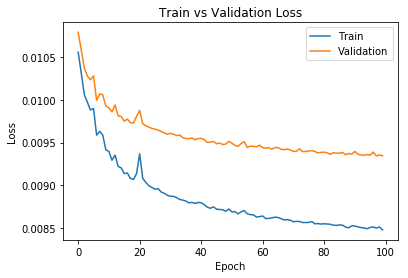

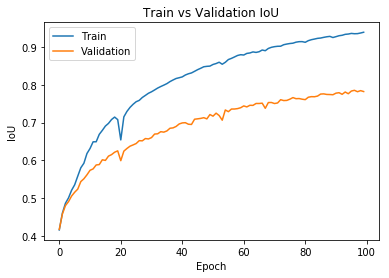

In [6]:
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=100, checkpoint=False, device=device)

In [9]:
torch.save(net.state_dict(), "try1")

Epoch:0, Train IoU:0.9289, Train Loss:0.0085|Valid IoU:0.7828, Valid Loss:0.0094
Epoch:1, Train IoU:0.9383, Train Loss:0.0085|Valid IoU:0.7859, Valid Loss:0.0093
Epoch:2, Train IoU:0.9422, Train Loss:0.0085|Valid IoU:0.7867, Valid Loss:0.0093
Epoch:3, Train IoU:0.9447, Train Loss:0.0085|Valid IoU:0.7885, Valid Loss:0.0093
Epoch:4, Train IoU:0.9469, Train Loss:0.0085|Valid IoU:0.7888, Valid Loss:0.0093
Epoch:5, Train IoU:0.9487, Train Loss:0.0085|Valid IoU:0.7901, Valid Loss:0.0093
Epoch:6, Train IoU:0.9502, Train Loss:0.0085|Valid IoU:0.7912, Valid Loss:0.0093
Epoch:7, Train IoU:0.9517, Train Loss:0.0085|Valid IoU:0.7921, Valid Loss:0.0093
Epoch:8, Train IoU:0.9531, Train Loss:0.0085|Valid IoU:0.7929, Valid Loss:0.0093
Epoch:9, Train IoU:0.9545, Train Loss:0.0085|Valid IoU:0.7939, Valid Loss:0.0093
Epoch:10, Train IoU:0.9557, Train Loss:0.0085|Valid IoU:0.7944, Valid Loss:0.0093
Epoch:11, Train IoU:0.9568, Train Loss:0.0085|Valid IoU:0.7955, Valid Loss:0.0093
Epoch:12, Train IoU:0.9579

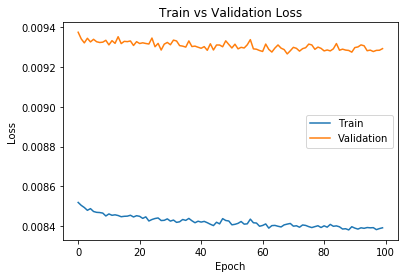

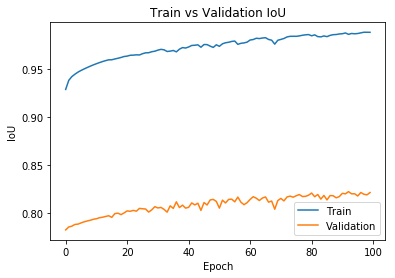

In [10]:
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=100, checkpoint=False, device=device)

In [11]:
torch.save(net.state_dict(), "try2")

Epoch:0, Train IoU:0.9680, Train Loss:0.0085|Valid IoU:0.8167, Valid Loss:0.0093
Epoch:1, Train IoU:0.9824, Train Loss:0.0084|Valid IoU:0.8191, Valid Loss:0.0093
Epoch:2, Train IoU:0.9856, Train Loss:0.0084|Valid IoU:0.8194, Valid Loss:0.0093
Epoch:3, Train IoU:0.9876, Train Loss:0.0084|Valid IoU:0.8202, Valid Loss:0.0093
Epoch:4, Train IoU:0.9887, Train Loss:0.0084|Valid IoU:0.8207, Valid Loss:0.0093
Epoch:5, Train IoU:0.9893, Train Loss:0.0084|Valid IoU:0.8206, Valid Loss:0.0093
Epoch:6, Train IoU:0.9897, Train Loss:0.0084|Valid IoU:0.8214, Valid Loss:0.0093
Epoch:7, Train IoU:0.9900, Train Loss:0.0084|Valid IoU:0.8214, Valid Loss:0.0093
Epoch:8, Train IoU:0.9902, Train Loss:0.0084|Valid IoU:0.8214, Valid Loss:0.0093
Epoch:9, Train IoU:0.9904, Train Loss:0.0084|Valid IoU:0.8217, Valid Loss:0.0093
Epoch:10, Train IoU:0.9906, Train Loss:0.0084|Valid IoU:0.8217, Valid Loss:0.0093
Epoch:11, Train IoU:0.9907, Train Loss:0.0084|Valid IoU:0.8218, Valid Loss:0.0093
Epoch:12, Train IoU:0.9908

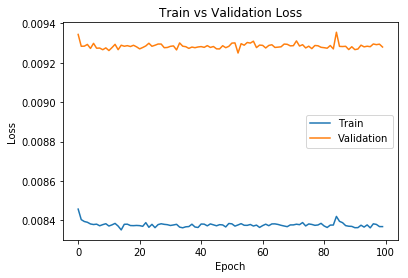

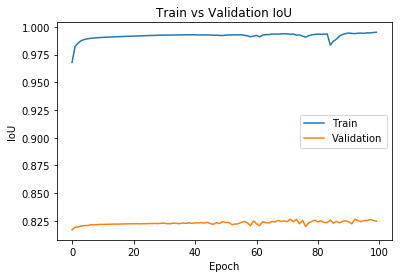

In [12]:
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=100, checkpoint=False, device=device)

In [13]:
torch.save(net.state_dict(), "try3")

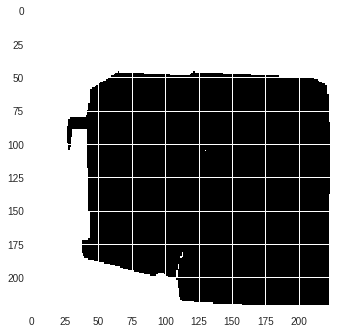

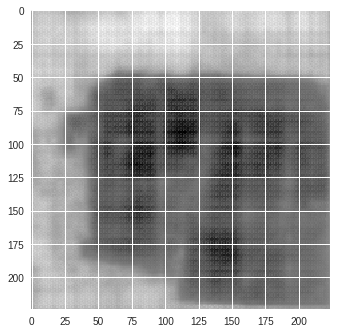

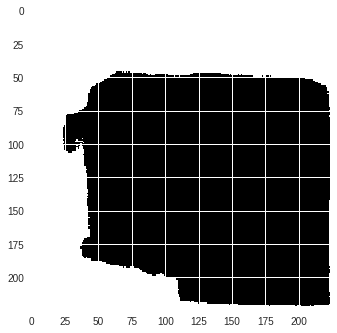

In [0]:
# After training

net.to("cpu")

img, target = train_data[0]

out = net(img.unsqueeze(0))
out = out.squeeze(0).squeeze(0).detach().numpy()

target = target.squeeze(0).detach().numpy()

plt.imshow(target)
plt.show()
plt.imshow(out)
plt.show()

result = torch.sigmoid(net(img.unsqueeze(0)))
result = thresholdProbMask(result.squeeze(0).squeeze(0).detach())

plt.imshow(result)
plt.show()